# Major League Baseball (MLB) Project

## Topic: Using batting average and slugging percentage data to determine the best contact and power hitters in the MLB

#### Author: Daniel Drangstveit

## Test Scrape a Webpage - MLB Stats (Part 1)

Test to see if the mlb stats data can be scraped without a user-agent or API Key

To get started, let's download data from [MLB Statistics](https://www.mlb.com/stats/)

In [1]:
# Import requests and regular expressions module in Python
import requests, re

In [2]:
# Download contents of the mlb.com/stats webpage
mlb = requests.get('https://www.mlb.com/stats/').text

In [3]:
# Find the length of the html
len(mlb)

486455

In [4]:
# Print the first 1000 characters to ensure html was requested properly
mlb[:1000]

'<!DOCTYPE html>\n<html lang="en">\n<head>\n    <title>2023 MLB Player Hitting Stat Leaders | MLB.com</title>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no">\n    <meta http-equiv="X-UA-Compatible" content="IE=Edge">\n    <meta name="description" content="The official source for player hitting stats, MLB home run leaders, batting average, OPS and stat leaders">\n    <meta property="og:description" content="The official source for player hitting stats, MLB home run leaders, batting average, OPS and stat leaders">\n    <meta property="og:title" content="2023 MLB Player Hitting Stat Leaders">\n    <meta property="og:image" content="https://www.mlbstatic.com/team-logos/share/mlb.jpg?v=2">\n    <meta property="og:site_name" content="MLB.com">\n    <meta property="og:type" content="website">\n    <meta property="og:url" content="https://www.mlb.com/stats">\n    <script src="/cdn-cgi/apps/head/d90UhUI

## Automate the Scraping for Multiple Webpages (Part 2)

The user is able to return all qualified hitters (see <b>Note</b> below) with their respective teams, number of at-bats, batting average, and slugging percentage.
- <b>Team</b>: notes the Major League Baseball Team a given player plays for
    - Teams are displayed as a 3-character string abbreviation of the team such as 'MIA' = Miami
- <b>At-bat (AB)</b>: an official at-bat comes when a batter reaches base via a fielder's choice, hit, error, or put out on a non-sacrifice
    - At-bats are displayed as an integer such as 95
    - Used as a denominator when determining batting average and slugging percentage
- <b>Batting Average (AVG)</b>: metric that evaluates a player's contact skills
    - Batting averages are displayed as a 3-decimal float such as 0.315
    - Higher the batting average, the better a player's contact skills
    - Formula: (Total Hits) / (Total At-Bats)
- <b>Slugging Percentage (SLG)</b>: metric that evaluates a player's power in a more sophisticated manner because it accounts for more than just home runs.
    - Slugging percentages are displayed as a 3-decimal float such as 0.556
    - Higher the slugging percentage, the better a player's power
    - Formula: (1B + 2B x 2 + 3B x 3 + HR x 4) / (Total At-Bats)
        - 1B = Player's Single Total
        - 2B = Player's Double Total
        - 3B = Player's Triple Total
        - HR = Player's Home Run Total
- <b>Note</b>: Players are only listed on the webpage if they have at least 3.1 plate appearances (At-Bats) per team game played

In [5]:
# Function that returns specific baseball statistics for all qualifying MLB players

def get_mlb_stats():
    import requests, re
    
    # Put the URL here
    url = 'https://www.mlb.com/stats/batting-average'
    
    # Download the contents of the mlb.com/stats/batting-average webpage
    html = requests.get(url).text

    # Find how many pages of data are needed
    page_button_list = re.findall(r'aria-label="page (.+?) button', html)
    total_pages = int(page_button_list[-1])
    
    # Start list that will be populated by scraping each webpage
    merged_list = []
    
    for x in range(total_pages):
        # Read in next webpage 
        if x > 0:
            # Put the URL for each individual webpage here
            url = 'https://www.mlb.com/stats/batting-average?page=' + str(x+1)
            
            # Download html contents of the webpage
            html = requests.get(url).text
        
        try:
            # Use a regular expression to find the hitters' names and respective values
            # Specifically, Team Names, At-Bats (AB), Batting Average (AVG), and Slugging Percentage (SLG)

            # Read in Player Names
            names = re.findall(r'tabindex\=\"0\"\saria\-label\=\"(.+?)\"\>', html)
            new_list = list(names)
            names_clean = []
            for x in new_list:
                name = x.replace('&#x27;', '\'')
                names_clean.append(name)
            
            # Read in Team Names
            teams = re.findall(r'data\-col\=\"1\"\sdata\-row\=\"(\d+)\"\>(.+?)\<', html)
            new_list = list(teams)
            teams_clean = []
            for x in new_list:
                teams_clean.append(x[1])
            
            # Read in Number of At-Bats
            AB = re.findall(r'data\-col\=\"3\"\sdata\-row\=\"(\d+)\"\>(.+?)\<', html)
            
            new_list = list(AB)
            AB_clean = []
            for x in new_list:
                AB_clean.append(int(x[1]))
            
            # Read in Batting Averages
            AVG = re.findall(r'data\-col\=\"14\"\sdata\-row\=\"(\d+)\"\>(.+?)\<', html)
            
            new_list = list(AVG)
            AVG_clean = []
            for x in new_list:
                AVG_clean.append(float(x[1]))
            
            # Read in Slugging Percentages
            SLG = re.findall(r'data\-col\=\"16\"\sdata\-row\=\"(\d+)\"\>(.+?)\<', html)

            new_list = list(SLG)
            SLG_clean = []
            for x in new_list:
                SLG_clean.append(float(x[1]))
            
            # Create list of players with all the data
            # Note list will be in order of decreasing batting averages (column 4)
            for i in range(0, len(names)):
                merged_list.append([names_clean[i], teams_clean[i], AB_clean[i], AVG_clean[i], SLG_clean[i]])

        except:
            # If the regular expression fails, do nothing
            pass
    
    return(merged_list)

In [6]:
# Check to see if names and respective baseball statistics (values) are returned properly.
# Note the the list will be in order of decreasing batting averages (column 4)
get_mlb_stats()

[['Luis Arraez', 'MIA', 467, 0.358, 0.46],
 ['Freddie Freeman', 'LAD', 487, 0.333, 0.575],
 ['Ronald Acuna Jr.', 'ATL', 497, 0.332, 0.567],
 ['Yandy Diaz', 'TB', 416, 0.325, 0.502],
 ['Cody Bellinger', 'CHC', 351, 0.322, 0.556],
 ['Bo Bichette', 'TOR', 459, 0.32, 0.501],
 ['Shohei Ohtani', 'LAA', 458, 0.306, 0.664],
 ['Josh Naylor', 'CLE', 360, 0.306, 0.5],
 ['Whit Merrifield', 'TOR', 440, 0.298, 0.423],
 ['Mookie Betts', 'LAD', 457, 0.298, 0.595],
 ['Kyle Tucker', 'HOU', 445, 0.297, 0.524],
 ['Masataka Yoshida', 'BOS', 429, 0.296, 0.462],
 ['Bryson Stott', 'PHI', 457, 0.295, 0.44],
 ['Bryce Harper', 'PHI', 341, 0.293, 0.449],
 ['Lane Thomas', 'WSH', 492, 0.289, 0.48],
 ['Justin Turner', 'BOS', 430, 0.288, 0.488],
 ['Christian Yelich', 'MIL', 467, 0.287, 0.456],
 ['Michael Harris II', 'ATL', 353, 0.286, 0.453],
 ['Joey Meneses', 'WSH', 473, 0.285, 0.421],
 ['Alec Bohm', 'PHI', 424, 0.285, 0.429],
 ['Orlando Arcia', 'ATL', 362, 0.282, 0.445],
 ['Austin Hays', 'BAL', 406, 0.281, 0.451],


## Descriptive Statistics on listed hitters based on Contact and Power (Part 3)

The user is able to leverage a pandas DataFrame to analyze MLB hitters who have the best contact and power skills based upon statistics.
- Z-score indicates how much a given value differs from the standard deviation. As such, the Z-score, or standard score, is the number of standard deviations a given data point lies above or below the mean.

In [7]:
# Import pandas module into Python
import pandas as pd

In [8]:
# Create a pandas DataFrame based upon the baseball statistics
mlb_stats = get_mlb_stats()
stat_df = pd.DataFrame(mlb_stats)
stat_df = stat_df.rename({0: 'Name', 1: 'Team', 2: 'At Bats', 3: 'Bat Avg', 4: 'Slug'}, axis=1)
display(stat_df)

,Name,Team,At Bats,Bat Avg,Slug
0,Luis Arraez,MIA,467,0.358,0.460
1,Freddie Freeman,LAD,487,0.333,0.575
2,Ronald Acuna Jr.,ATL,497,0.332,0.567
3,Yandy Diaz,TB,416,0.325,0.502
4,Cody Bellinger,CHC,351,0.322,0.556
...,...,...,...,...,...
134,Trent Grisham,SD,386,0.210,0.376
135,Jack Suwinski,PIT,336,0.202,0.440
136,Alex Call,WSH,335,0.197,0.293
137,Max Muncy,LAD,348,0.193,0.468


In [9]:
# Calculate League Average Batting Average
league_average = round(stat_df.loc[:,'Bat Avg'].mean(),3)
league_std = round(stat_df.loc[:,'Bat Avg'].std(),3)

# Calculate z-score and add column to dataframe
stat_df['Bat Avg Z-score'] = round((stat_df['Bat Avg'] - league_average) / league_std , 2)

# Calculate League Average Slugging Percentage
league_average = round(stat_df.loc[:,'Slug'].mean(),3)
league_std = round(stat_df.loc[:,'Slug'].std(),3)

# Calculate z-score and add column to dataframe
stat_df['Slug Z-score'] = round((stat_df['Slug'] - league_average) / league_std , 2)
display(stat_df)

,Name,Team,At Bats,Bat Avg,Slug,Bat Avg Z-score,Slug Z-score
0,Luis Arraez,MIA,467,0.358,0.460,3.59,0.29
1,Freddie Freeman,LAD,487,0.333,0.575,2.67,2.15
2,Ronald Acuna Jr.,ATL,497,0.332,0.567,2.63,2.02
3,Yandy Diaz,TB,416,0.325,0.502,2.37,0.97
4,Cody Bellinger,CHC,351,0.322,0.556,2.26,1.84
...,...,...,...,...,...,...,...
134,Trent Grisham,SD,386,0.210,0.376,-1.89,-1.06
135,Jack Suwinski,PIT,336,0.202,0.440,-2.19,-0.03
136,Alex Call,WSH,335,0.197,0.293,-2.37,-2.40
137,Max Muncy,LAD,348,0.193,0.468,-2.52,0.42


In [10]:
# Organize dataframe columns
new_stat_df = stat_df[['Name', 'Team', 'At Bats', 'Bat Avg', 'Bat Avg Z-score', 'Slug', 'Slug Z-score']]
display(new_stat_df)

,Name,Team,At Bats,Bat Avg,Bat Avg Z-score,Slug,Slug Z-score
0,Luis Arraez,MIA,467,0.358,3.59,0.460,0.29
1,Freddie Freeman,LAD,487,0.333,2.67,0.575,2.15
2,Ronald Acuna Jr.,ATL,497,0.332,2.63,0.567,2.02
3,Yandy Diaz,TB,416,0.325,2.37,0.502,0.97
4,Cody Bellinger,CHC,351,0.322,2.26,0.556,1.84
...,...,...,...,...,...,...,...
134,Trent Grisham,SD,386,0.210,-1.89,0.376,-1.06
135,Jack Suwinski,PIT,336,0.202,-2.19,0.440,-0.03
136,Alex Call,WSH,335,0.197,-2.37,0.293,-2.40
137,Max Muncy,LAD,348,0.193,-2.52,0.468,0.42


In [11]:
# Save Batting Average data to .csv file
new_stat_df.to_csv('MLB_Player_Stats.csv', index=False)

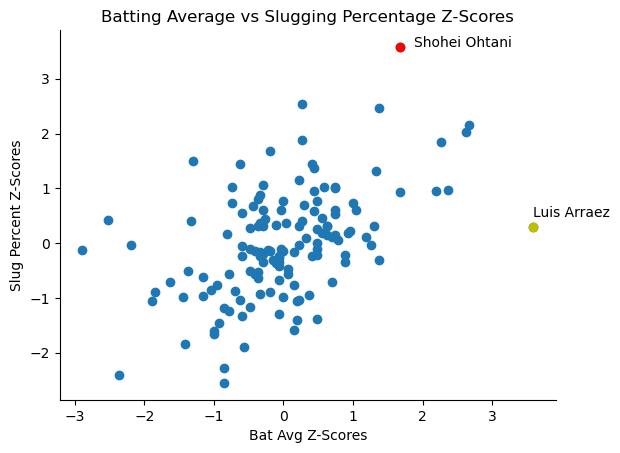

In [12]:
# Display Batting Average vs Slugging Percentage Z-scores
import matplotlib.pyplot as plt

# Plot data
plt.scatter(new_stat_df['Bat Avg Z-score'],new_stat_df['Slug Z-score'])

# Add title and axis labels
plt.title('Batting Average vs Slugging Percentage Z-Scores')
plt.xlabel('Bat Avg Z-Scores')
plt.ylabel('Slug Percent Z-Scores')

# Remove top and right lines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Display names of best contact hitter (yellow) and best power hitter (red)
plt.plot(new_stat_df['Bat Avg Z-score'][new_stat_df['Bat Avg Z-score'].idxmax()],new_stat_df['Slug Z-score'][new_stat_df['Bat Avg Z-score'].idxmax()],color='y',marker='o')
plt.text(new_stat_df['Bat Avg Z-score'][new_stat_df['Bat Avg Z-score'].idxmax()],new_stat_df['Slug Z-score'][new_stat_df['Bat Avg Z-score'].idxmax()]+0.2,str(new_stat_df['Name'][new_stat_df['Bat Avg Z-score'].idxmax()]))

plt.plot(new_stat_df['Bat Avg Z-score'][new_stat_df['Slug Z-score'].idxmax()],new_stat_df['Slug Z-score'][new_stat_df['Slug Z-score'].idxmax()],color='r',marker='o')
plt.text(new_stat_df['Bat Avg Z-score'][new_stat_df['Slug Z-score'].idxmax()]+0.2,new_stat_df['Slug Z-score'][new_stat_df['Slug Z-score'].idxmax()],str(new_stat_df['Name'][new_stat_df['Slug Z-score'].idxmax()]))

plt.show()